In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data=pd.read_csv(r"C:\Users\HP PC\Desktop\abhi\expenses 1.csv")

In [75]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## EDA

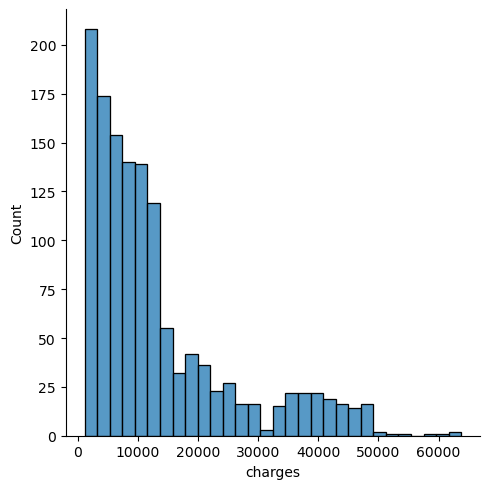

In [8]:
sns.displot(x='charges',data=data)

In [12]:
from scipy.stats import skew

skewness = skew(data['charges'])
print(f"Skewness: {skewness}")

Skewness: 1.5141797118745743


skewness is greater than one implies high skewness.

In [76]:
data['log_charges'] = np.log(data['charges'])

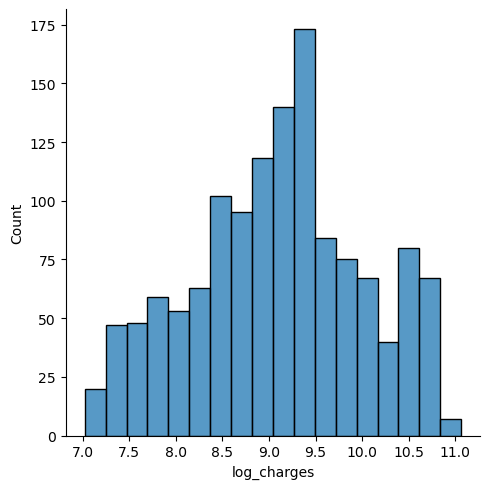

In [10]:
sns.displot(x='log_charges',data=data)

In [23]:
data.select_dtypes(include='number').corr()['charges']

age            0.299008
bmi            0.198341
children       0.067998
charges        1.000000
log_charges    0.892964
Name: charges, dtype: float64

In [25]:
smoker_counts=data['smoker'].value_counts()
smoker_counts

smoker
no     1064
yes     274
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

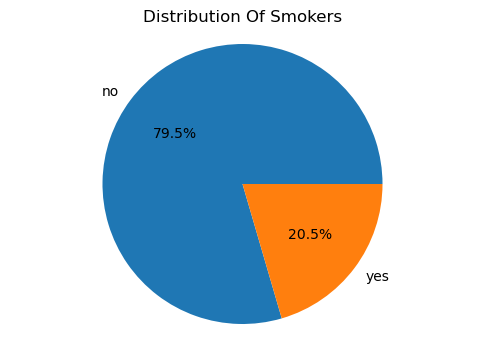

In [26]:
plt.figure(figsize=(6,4))
plt.pie(smoker_counts,labels=smoker_counts.index,autopct='%1.1f%%')
plt.title('Distribution Of Smokers')
plt.axis('equal')
plt.show

<Axes: xlabel='children', ylabel='count'>

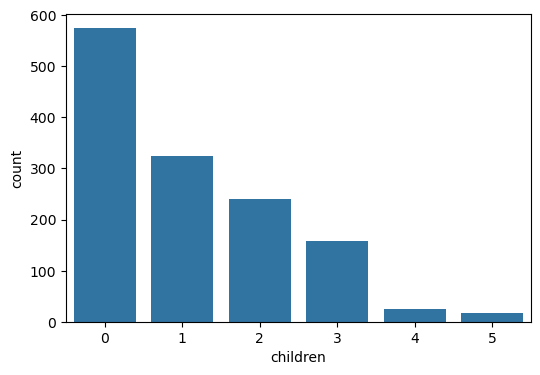

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='children',data=data)

##### exploring Age and Bmi as it is positively correlated with charges through scatterplot.

<Axes: xlabel='age', ylabel='charges'>

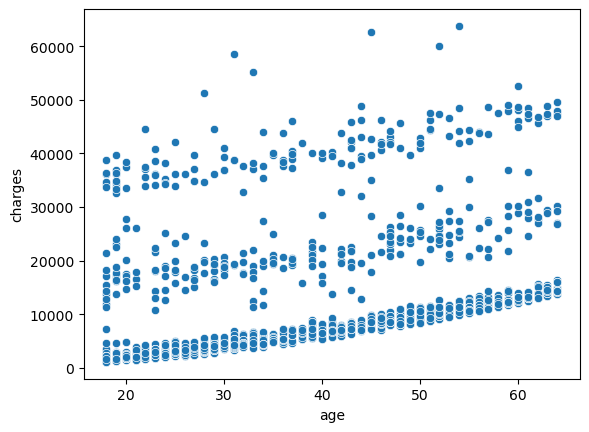

In [31]:
sns.scatterplot(x='age',y='charges',data=data)

<Axes: xlabel='bmi', ylabel='charges'>

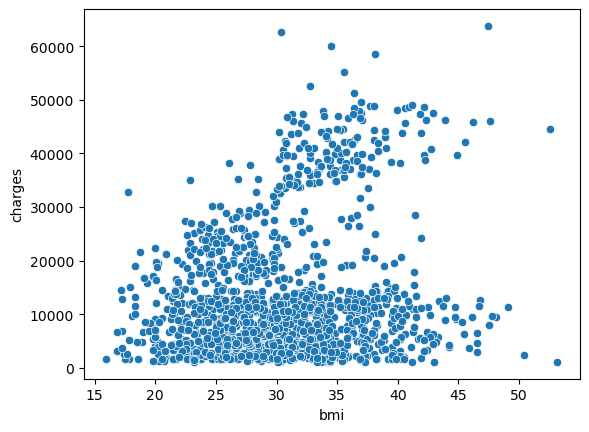

In [32]:
sns.scatterplot(x='bmi',y='charges',data=data)

<Axes: xlabel='children', ylabel='charges'>

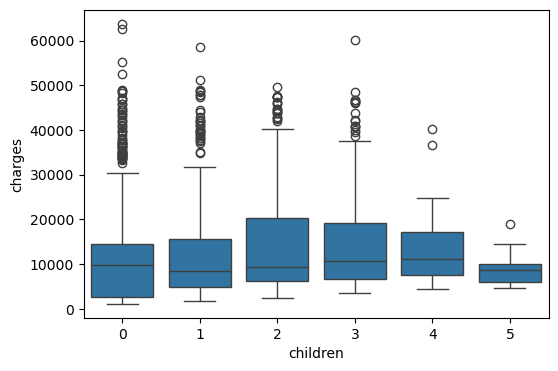

In [37]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='children', y='charges', data=data)

<Axes: xlabel='smoker', ylabel='charges'>

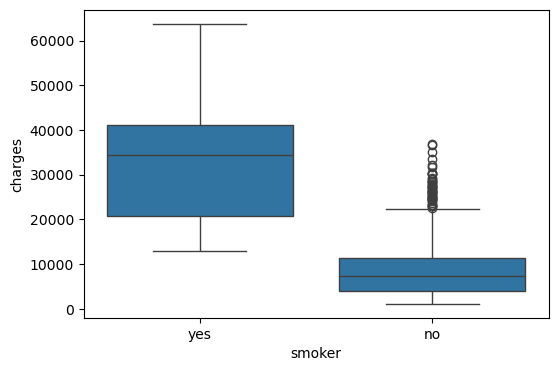

In [38]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='charges', data=data)

There is difference in mean charges of a smoker and a non smoker,smokers tend to have high medical expense.

<Axes: xlabel='region', ylabel='charges'>

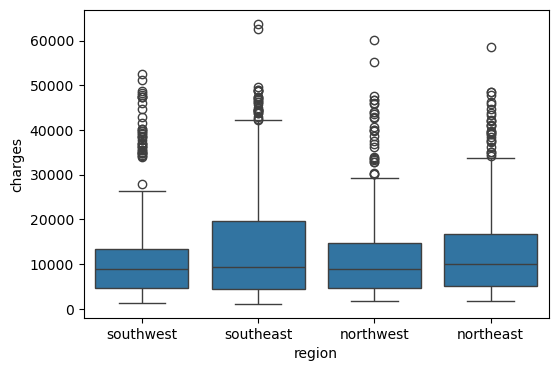

In [36]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='region', y='charges', data=data)

In [39]:
#Understanding medical expense variation by region ,gender, smoking,family size.
region_expenses = data.groupby('region')['charges'].mean()
sex_expenses = data.groupby('sex')['charges'].mean()
smoker_expenses = data.groupby('smoker')['charges'].mean()
child_expenses = data.groupby('children')['charges'].mean()

print("Mean Expenses by Region:")
print(region_expenses)
print("\nMean Expenses by Sex:")
print(sex_expenses)
print("\nMean Expenses by Smoking Status:")
print(smoker_expenses)
print("\nMean Expenses by Number of Children:")
print(child_expenses)


Mean Expenses by Region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Mean Expenses by Sex:
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

Mean Expenses by Smoking Status:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Mean Expenses by Number of Children:
children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


## DATA PREPROCESSING AND FEATURE ENGINEERING

In [77]:
data.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [78]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,age,bmi,children,charges,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,9.734176,False,True,False,False,True
1,18,33.770,1,1725.55230,7.453302,True,False,False,True,False
2,28,33.000,3,4449.46200,8.400538,True,False,False,True,False
3,33,22.705,0,21984.47061,9.998092,True,False,True,False,False
4,32,28.880,0,3866.85520,8.260197,True,False,True,False,False


In [79]:
X = data.drop(['log_charges','charges'],axis=1)
y = data['log_charges']

In [81]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [83]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model building and evaluation:

#### HUBER REGRESSION

In [84]:
from sklearn.linear_model import HuberRegressor
huber= HuberRegressor()

In [85]:
huber.fit(X_train, y_train)

HuberRegressor()

In [86]:
y_pred = huber.predict(X_test)

In [87]:
coefficients = huber.coef_
print("Coefficients:", coefficients)

intercept = huber.intercept_
print("Intercept:", intercept)

Coefficients: [ 1.00425282  0.0283491   0.20564826 -0.073903    1.54347813 -0.03929904
 -0.10465074 -0.07895304]
Intercept: 8.709828395796295


In [88]:
y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred)

<Axes: >

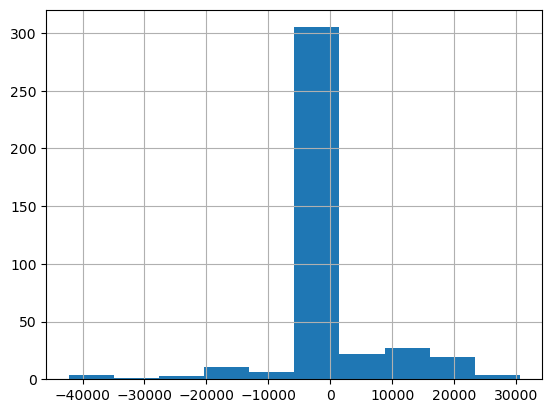

In [89]:
error=(y_test_original-y_pred_original)
error.hist()

In [90]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae=mean_absolute_error(y_test_original, y_pred_original)

print("R-squared (R2) score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean absolute Error (RMSE):", mae)

R-squared (R2) score: 0.5165219944546944
Root Mean Squared Error (RMSE): 8419.59784936982
Mean absolute Error (RMSE): 3960.1045935589505


**since the R squared value is 0.51,which means 51% of the variance in the target variable (charges) is explained by the independent variables (features).  
So for better prediction modelling the data using Random forest classifier.**

#### RANDOM FOREST CLASSIFIER

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
rf=RandomForestRegressor(n_estimators=300)

In [92]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300)

In [93]:
pred=rf.predict(X_test)

In [94]:
y_test_original = np.exp(y_test)
y_pred_original = np.exp(pred)

In [100]:
r2 = r2_score(y_test_original, y_pred_original)
rmse =(mean_squared_error(y_test_original, y_pred_original))**0.5
mae=mean_absolute_error(y_test_original, y_pred_original)
print("R-squared (R2) score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean absolute Error (MAE:", mae)

R-squared (R2) score: 0.8671074397628442
Root Mean Squared Error (RMSE): 4414.21336922576
Mean absolute Error (MAE: 2123.9364220457446


86% of the variance in the target variable (charges) is explained by the independent variables (features).  

In [96]:
data['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

mean of the charges column is 13270,and our MAE is 2123.implies nearly 15% error

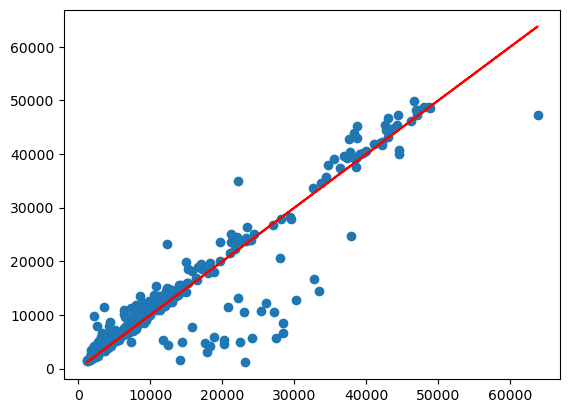

In [103]:
plt.scatter(y_test_original, y_pred_original)
plt.plot(y_test_original,y_test_original,'r')